<a href="https://colab.research.google.com/github/woorain20/2022-rainy/blob/main/METRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 깨짐 방지 위한 설치

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
# 기본 임포트

In [4]:
# basic 
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [5]:
import io

In [6]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

In [7]:
from google.colab import files

In [8]:
# 파일 로드

In [9]:
files = files.upload()

Saving CARD_SUBWAY_MONTH_202201.csv to CARD_SUBWAY_MONTH_202201 (1).csv


In [10]:
data="./CARD_SUBWAY_MONTH_202201.csv"

In [11]:
dat=pd.read_csv(data)

In [12]:
# dat 확인
dat

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20220101,3호선,수서,7370,7076,20220104,NaN
20220101,3호선,학여울,461,473,20220104,NaN
20220101,3호선,대청,3224,2903,20220104,NaN
20220101,3호선,일원,3321,2803,20220104,NaN
20220101,경원선,창동,1,0,20220104,NaN
...,...,...,...,...,...,...
20220131,우이신설선,솔밭공원,975,966,20220203,NaN
20220131,우이신설선,북한산우이,1641,1683,20220203,NaN
20220131,안산선,수리산,1333,1225,20220203,NaN
20220131,안산선,오이도,3753,3975,20220203,NaN


In [13]:
dat=dat.drop(["등록일자"], axis=1)
dat

,사용일자,노선명,역명,승차총승객수,하차총승객수
20220101,3호선,수서,7370,7076,20220104
20220101,3호선,학여울,461,473,20220104
20220101,3호선,대청,3224,2903,20220104
20220101,3호선,일원,3321,2803,20220104
20220101,경원선,창동,1,0,20220104
...,...,...,...,...,...
20220131,우이신설선,솔밭공원,975,966,20220203
20220131,우이신설선,북한산우이,1641,1683,20220203
20220131,안산선,수리산,1333,1225,20220203
20220131,안산선,오이도,3753,3975,20220203


In [14]:
dat.to_csv("./Test1.csv")

In [15]:
dat1="./Test1.csv"

In [16]:
df=pd.read_csv(dat1)

In [17]:
df

,Unnamed: 0,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20220101,3호선,수서,7370,7076,20220104
1,20220101,3호선,학여울,461,473,20220104
2,20220101,3호선,대청,3224,2903,20220104
3,20220101,3호선,일원,3321,2803,20220104
4,20220101,경원선,창동,1,0,20220104
...,...,...,...,...,...,...
18516,20220131,우이신설선,솔밭공원,975,966,20220203
18517,20220131,우이신설선,북한산우이,1641,1683,20220203
18518,20220131,안산선,수리산,1333,1225,20220203
18519,20220131,안산선,오이도,3753,3975,20220203


In [18]:
df.columns=['날짜', '노선', '역', '승차승객', '하차승객', '등록일']
df

,날짜,노선,역,승차승객,하차승객,등록일
0,20220101,3호선,수서,7370,7076,20220104
1,20220101,3호선,학여울,461,473,20220104
2,20220101,3호선,대청,3224,2903,20220104
3,20220101,3호선,일원,3321,2803,20220104
4,20220101,경원선,창동,1,0,20220104
...,...,...,...,...,...,...
18516,20220131,우이신설선,솔밭공원,975,966,20220203
18517,20220131,우이신설선,북한산우이,1641,1683,20220203
18518,20220131,안산선,수리산,1333,1225,20220203
18519,20220131,안산선,오이도,3753,3975,20220203


In [19]:
df=df.drop(["등록일"], axis=1)
df

,날짜,노선,역,승차승객,하차승객
0,20220101,3호선,수서,7370,7076
1,20220101,3호선,학여울,461,473
2,20220101,3호선,대청,3224,2903
3,20220101,3호선,일원,3321,2803
4,20220101,경원선,창동,1,0
...,...,...,...,...,...
18516,20220131,우이신설선,솔밭공원,975,966
18517,20220131,우이신설선,북한산우이,1641,1683
18518,20220131,안산선,수리산,1333,1225
18519,20220131,안산선,오이도,3753,3975


In [20]:
# 컬럼 추가

In [21]:
df.insert(5, "총 승객", df["승차승객"]+df["하차승객"])

In [22]:
df.insert(6, "승차-하차", df["승차승객"]-df["하차승객"])

In [23]:
df

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차
0,20220101,3호선,수서,7370,7076,14446,294
1,20220101,3호선,학여울,461,473,934,-12
2,20220101,3호선,대청,3224,2903,6127,321
3,20220101,3호선,일원,3321,2803,6124,518
4,20220101,경원선,창동,1,0,1,1
...,...,...,...,...,...,...,...
18516,20220131,우이신설선,솔밭공원,975,966,1941,9
18517,20220131,우이신설선,북한산우이,1641,1683,3324,-42
18518,20220131,안산선,수리산,1333,1225,2558,108
18519,20220131,안산선,오이도,3753,3975,7728,-222


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18521 entries, 0 to 18520
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      18521 non-null  int64 
 1   노선      18521 non-null  object
 2   역       18521 non-null  object
 3   승차승객    18521 non-null  int64 
 4   하차승객    18521 non-null  int64 
 5   총 승객    18521 non-null  int64 
 6   승차-하차   18521 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1013.0+ KB


In [25]:
# 날짜 형변환 (Datetime으로)

In [26]:
# int형의 날짜를 object형으로 변환

In [27]:
df['날짜']= df['날짜'].astype('str')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18521 entries, 0 to 18520
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      18521 non-null  object
 1   노선      18521 non-null  object
 2   역       18521 non-null  object
 3   승차승객    18521 non-null  int64 
 4   하차승객    18521 non-null  int64 
 5   총 승객    18521 non-null  int64 
 6   승차-하차   18521 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1013.0+ KB


In [29]:
# object형을 datetime으로 변환

In [30]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18521 entries, 0 to 18520
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      18521 non-null  datetime64[ns]
 1   노선      18521 non-null  object        
 2   역       18521 non-null  object        
 3   승차승객    18521 non-null  int64         
 4   하차승객    18521 non-null  int64         
 5   총 승객    18521 non-null  int64         
 6   승차-하차   18521 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1013.0+ KB


In [32]:
# 요일 추가

In [33]:
df['weekday'] = df['날짜'].dt.weekday

In [34]:
df

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,weekday
0,2022-01-01,3호선,수서,7370,7076,14446,294,5
1,2022-01-01,3호선,학여울,461,473,934,-12,5
2,2022-01-01,3호선,대청,3224,2903,6127,321,5
3,2022-01-01,3호선,일원,3321,2803,6124,518,5
4,2022-01-01,경원선,창동,1,0,1,1,5
...,...,...,...,...,...,...,...,...
18516,2022-01-31,우이신설선,솔밭공원,975,966,1941,9,0
18517,2022-01-31,우이신설선,북한산우이,1641,1683,3324,-42,0
18518,2022-01-31,안산선,수리산,1333,1225,2558,108,0
18519,2022-01-31,안산선,오이도,3753,3975,7728,-222,0


In [35]:
# weekday를 한글 날짜로 변환
# # 0 = 월, 1 = 화, 2 = 수, 3 = 목, 4= 금, 5 = 토, 6 = 일
# 한글로 변환 위해 리스트 필요

In [36]:
weekday_list = ['월', '화', '수', '목', '금', '토', '일']

In [37]:
df['요일'] = df.apply(lambda x : weekday_list[x['weekday']], axis = 1)

In [38]:
df

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,weekday,요일
0,2022-01-01,3호선,수서,7370,7076,14446,294,5,토
1,2022-01-01,3호선,학여울,461,473,934,-12,5,토
2,2022-01-01,3호선,대청,3224,2903,6127,321,5,토
3,2022-01-01,3호선,일원,3321,2803,6124,518,5,토
4,2022-01-01,경원선,창동,1,0,1,1,5,토
...,...,...,...,...,...,...,...,...,...
18516,2022-01-31,우이신설선,솔밭공원,975,966,1941,9,0,월
18517,2022-01-31,우이신설선,북한산우이,1641,1683,3324,-42,0,월
18518,2022-01-31,안산선,수리산,1333,1225,2558,108,0,월
18519,2022-01-31,안산선,오이도,3753,3975,7728,-222,0,월


In [39]:
# weekday 컬럼 삭제
# 향후를 위해 삭제 안 할수도 있으나 그건 나중 문제

In [40]:
df=df.drop("weekday", axis=1)
df

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,요일
0,2022-01-01,3호선,수서,7370,7076,14446,294,토
1,2022-01-01,3호선,학여울,461,473,934,-12,토
2,2022-01-01,3호선,대청,3224,2903,6127,321,토
3,2022-01-01,3호선,일원,3321,2803,6124,518,토
4,2022-01-01,경원선,창동,1,0,1,1,토
...,...,...,...,...,...,...,...,...
18516,2022-01-31,우이신설선,솔밭공원,975,966,1941,9,월
18517,2022-01-31,우이신설선,북한산우이,1641,1683,3324,-42,월
18518,2022-01-31,안산선,수리산,1333,1225,2558,108,월
18519,2022-01-31,안산선,오이도,3753,3975,7728,-222,월


In [41]:
# 데이터 저장

In [42]:
df=df.to_csv("./2201.csv", index=False)

In [44]:
df=pd.read_csv("./2201.csv")
df

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,요일
0,2022-01-01,3호선,수서,7370,7076,14446,294,토
1,2022-01-01,3호선,학여울,461,473,934,-12,토
2,2022-01-01,3호선,대청,3224,2903,6127,321,토
3,2022-01-01,3호선,일원,3321,2803,6124,518,토
4,2022-01-01,경원선,창동,1,0,1,1,토
...,...,...,...,...,...,...,...,...
18516,2022-01-31,우이신설선,솔밭공원,975,966,1941,9,월
18517,2022-01-31,우이신설선,북한산우이,1641,1683,3324,-42,월
18518,2022-01-31,안산선,수리산,1333,1225,2558,108,월
18519,2022-01-31,안산선,오이도,3753,3975,7728,-222,월


In [45]:
# csv 파일 1차 완성
# 추후 필요에 따라 컬럼 추가 생성 및 삭제, 수정 가능

In [49]:
test1=df[["노선", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby(["노선"]).mean()
test1

,승차승객,하차승객,총 승객,승차-하차
노선,,,,
1호선,17825.509677,17371.116129,35196.625806,454.393548
2호선,21758.838710,21894.394194,43653.232903,-135.555484
3호선,12192.941402,12190.842459,24383.783862,2.098943
4호선,14649.332506,14787.870968,29437.203474,-138.538462
5호선,9049.910138,9005.865207,18055.775346,44.044931
6호선,6885.377035,6778.464439,13663.841474,106.912596
7호선,10542.973534,10402.676681,20945.650215,140.296853
8호선,8370.405018,8484.657706,16855.062724,-114.252688
9호선,8837.771613,8975.792258,17813.563871,-138.020645


In [50]:
test2=df[["날짜", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby(["날짜"]).mean()
test2

,승차승객,하차승객,총 승객,승차-하차
날짜,,,,
2022-01-01,4367.469900,4340.680602,8708.150502,26.789298
2022-01-02,4992.242881,4967.726968,9959.969849,24.515913
2022-01-03,10249.716667,10217.215000,20466.931667,32.501667
2022-01-04,10545.230897,10509.192691,21054.423588,36.038206
2022-01-05,10671.567839,10641.190955,21312.758794,30.376884
2022-01-06,10824.640336,10795.194958,21619.835294,29.445378
2022-01-07,11148.011745,11115.647651,22263.659396,32.364094
2022-01-08,7519.821070,7486.005017,15005.826087,33.816054
2022-01-09,5422.766387,5392.494118,10815.260504,30.272269


In [51]:
test3=df[["요일", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby(["요일"]).mean()
test3

,승차승객,하차승객,총 승객,승차-하차
요일,,,,
금,11079.190138,11044.111993,22123.302131,35.078145
목,10889.031839,10858.449099,21747.480938,30.582740
수,10933.878978,10902.181742,21836.060720,31.697236
월,9221.985963,9190.227607,18412.213570,31.758356
일,5244.782288,5215.258973,10460.041261,29.523314
토,6741.501005,6707.598861,13449.099866,33.902145
화,10786.219115,10754.864357,21541.083472,31.354758


In [52]:
test4=df[["역", "승차승객", "하차승객", "총 승객", "승차-하차"]].groupby(["역"]).mean()
test4

,승차승객,하차승객,총 승객,승차-하차
역,,,,
4.19민주묘지,2357.612903,2193.612903,4551.225806,164.000000
가능,5315.129032,5154.290323,10469.419355,160.838710
가락시장,6902.096774,7157.516129,14059.612903,-255.419355
가산디지털단지,23848.645161,24739.241935,48587.887097,-890.596774
가양,16516.580645,16095.258065,32611.838710,421.322581
...,...,...,...,...
회기,19607.516129,18922.806452,38530.322581,684.709677
회룡,10218.064516,10130.903226,20348.967742,87.161290
회현(남대문시장),18868.387097,19947.193548,38815.580645,-1078.806452


In [53]:
test4.sample(20)

,승차승객,하차승객,총 승객,승차-하차
역,,,,
상수,7370.516129,8142.967742,15513.483871,-772.451613
잠실(송파구청),36056.145161,36469.951613,72526.096774,-413.806452
하남시청(덕풍·신장),5407.677419,5283.000000,10690.677419,124.677419
암사,15364.419355,13892.838710,29257.258065,1471.580645
한티,12810.419355,13364.741935,26175.161290,-554.322581
양주,6179.258065,5879.322581,12058.580645,299.935484
개롱,5083.903226,5387.548387,10471.451613,-303.645161
부평,26075.419355,27488.612903,53564.032258,-1413.193548
개화산,4467.870968,4337.032258,8804.903226,130.838710


In [57]:
# 라인 count를 그래프로

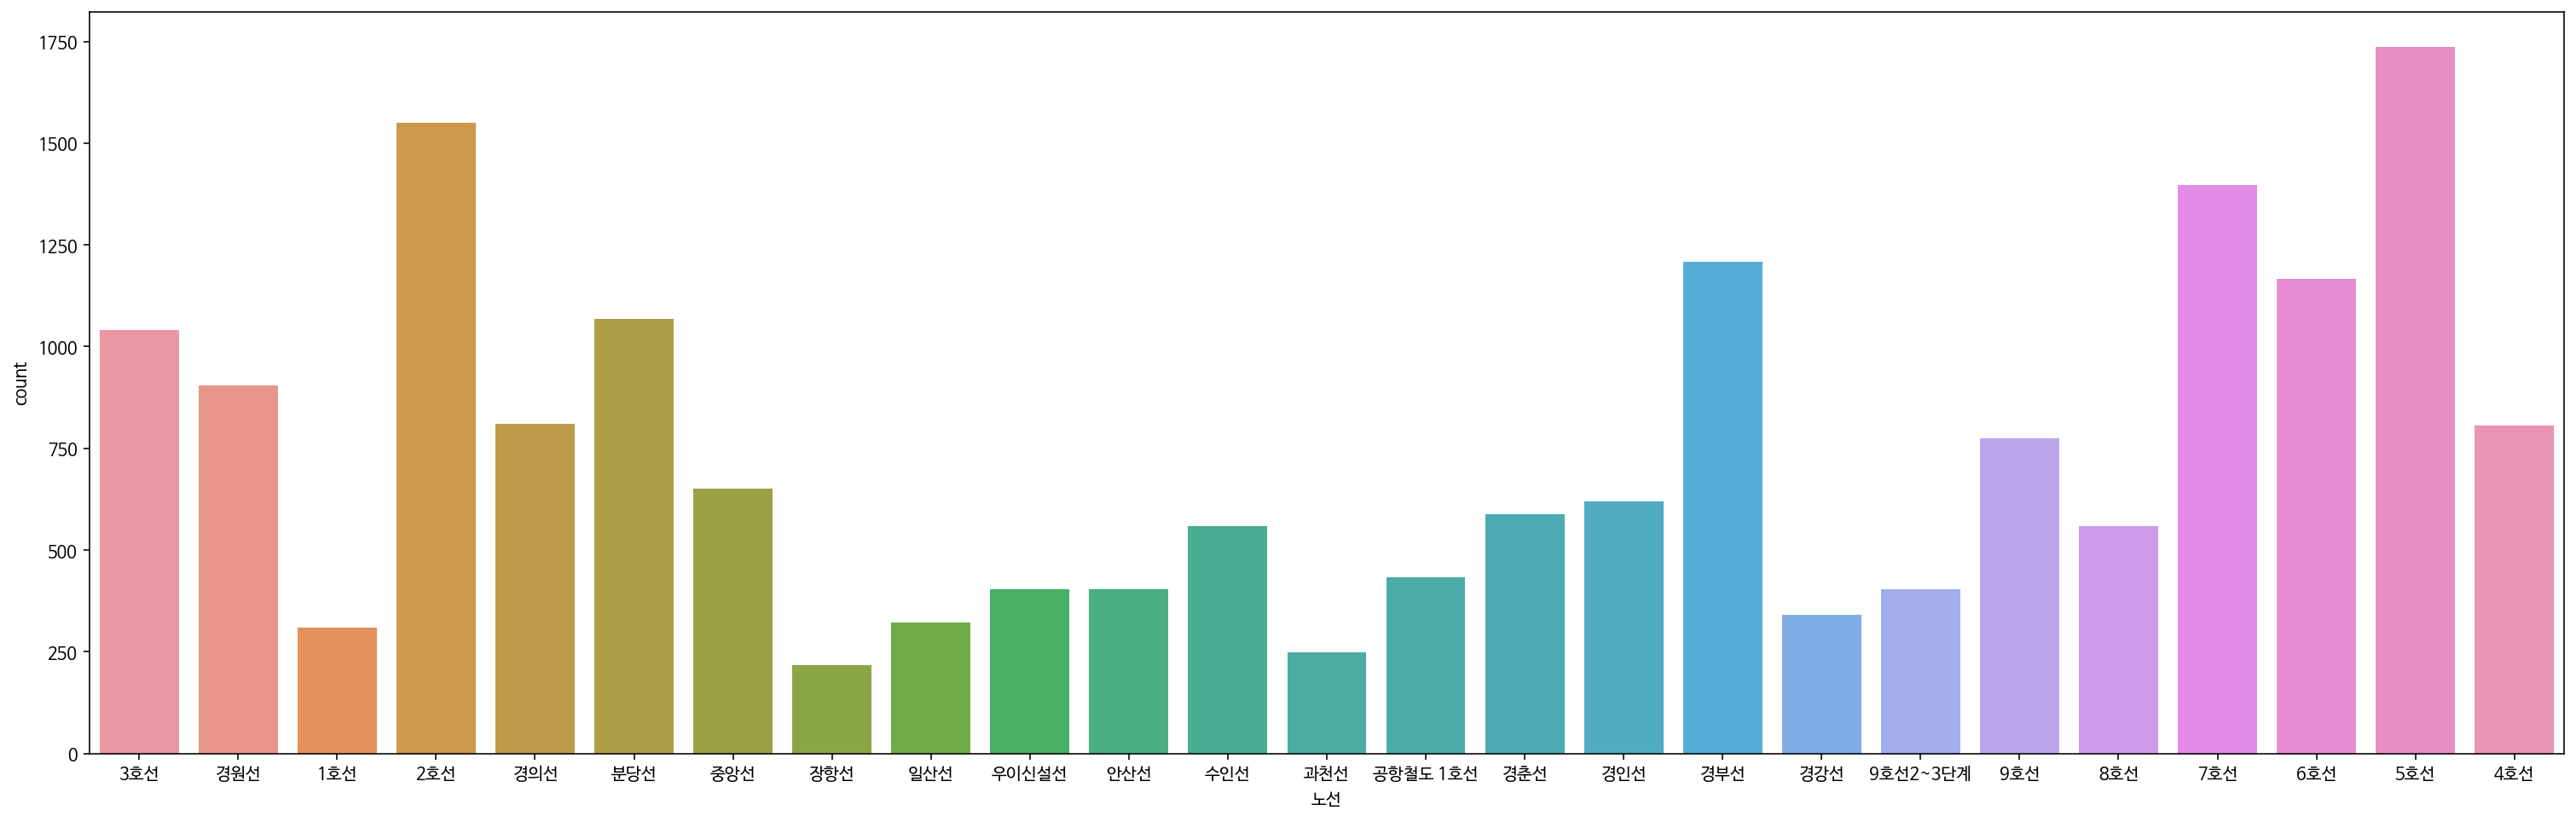

In [56]:
fig=plt.subplots(1, figsize=(26,8))
sns.countplot(x=df["노선"])
plt.show()

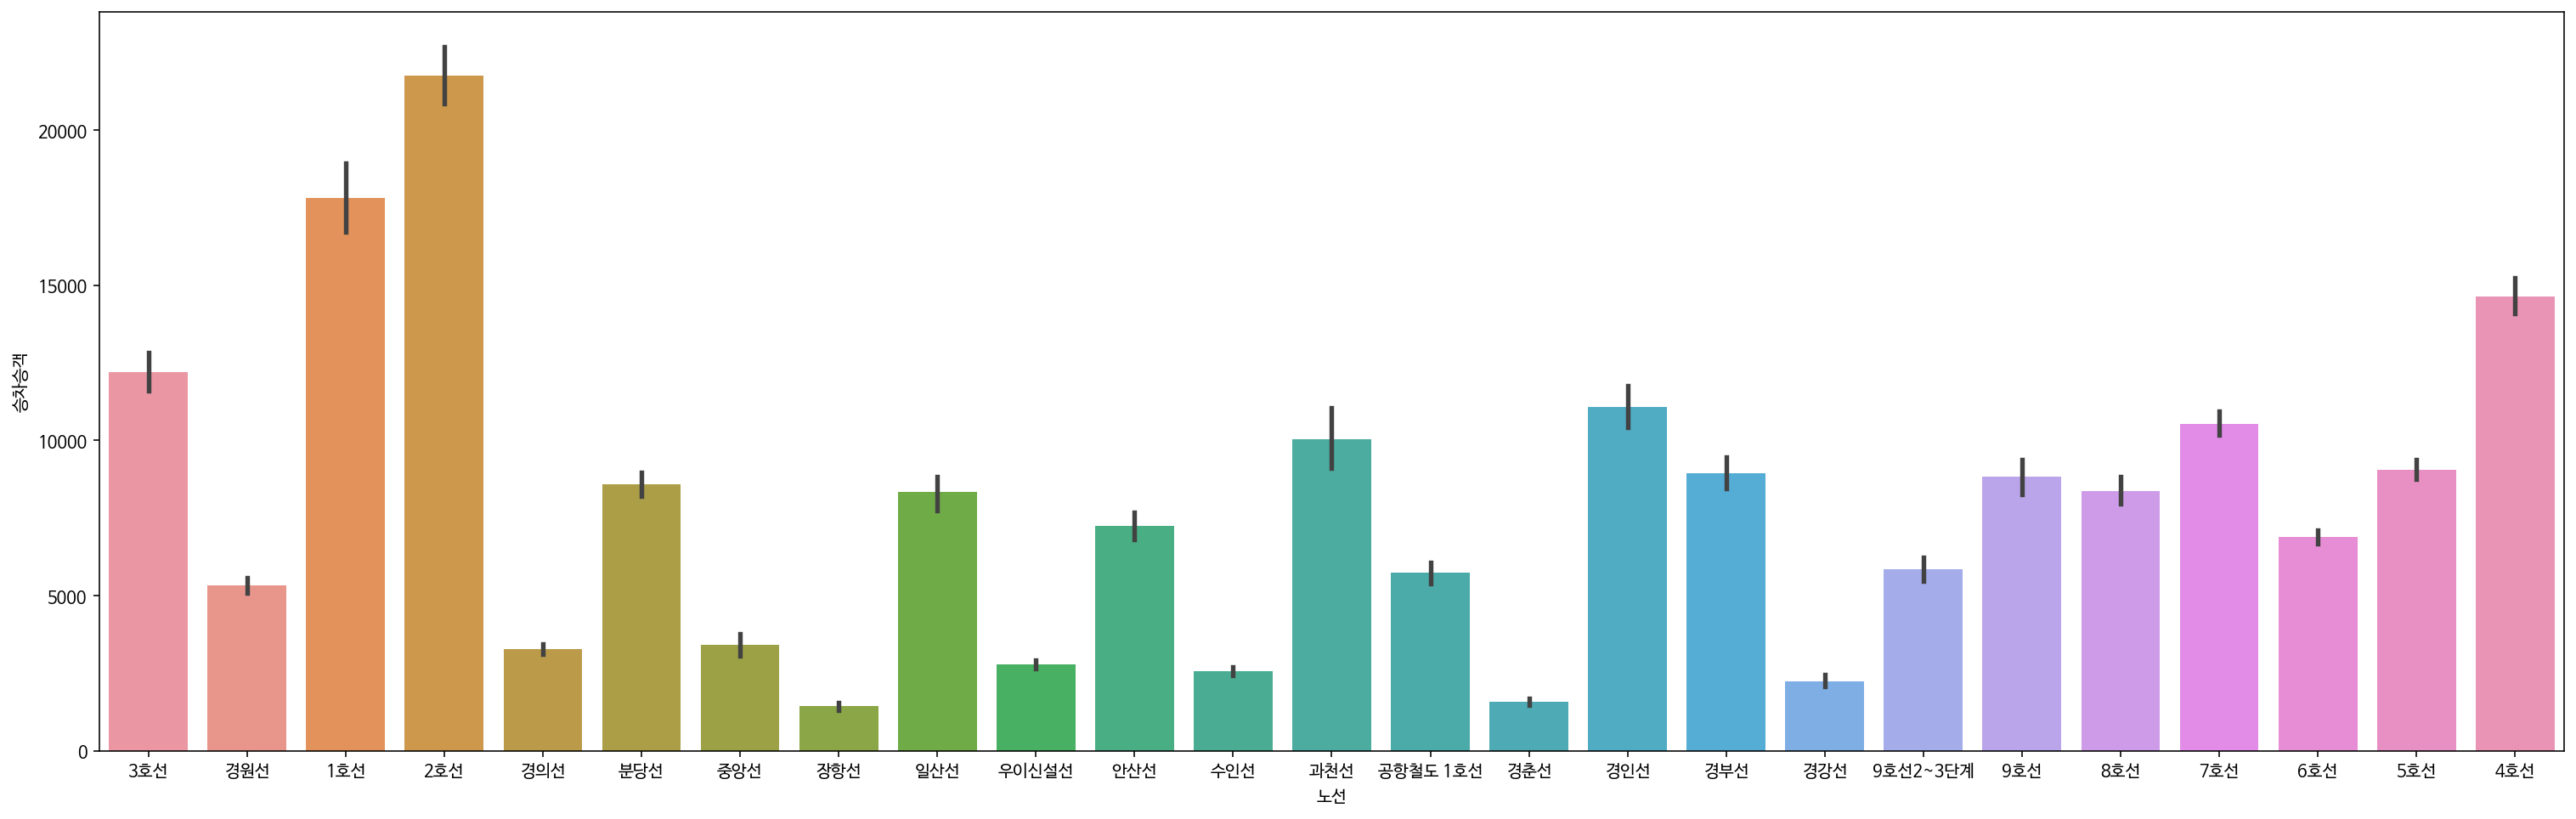

In [58]:
fig=plt.subplots(1, figsize=(26,8))
sns.barplot(x=df["노선"], y=df["승차승객"])
plt.show()

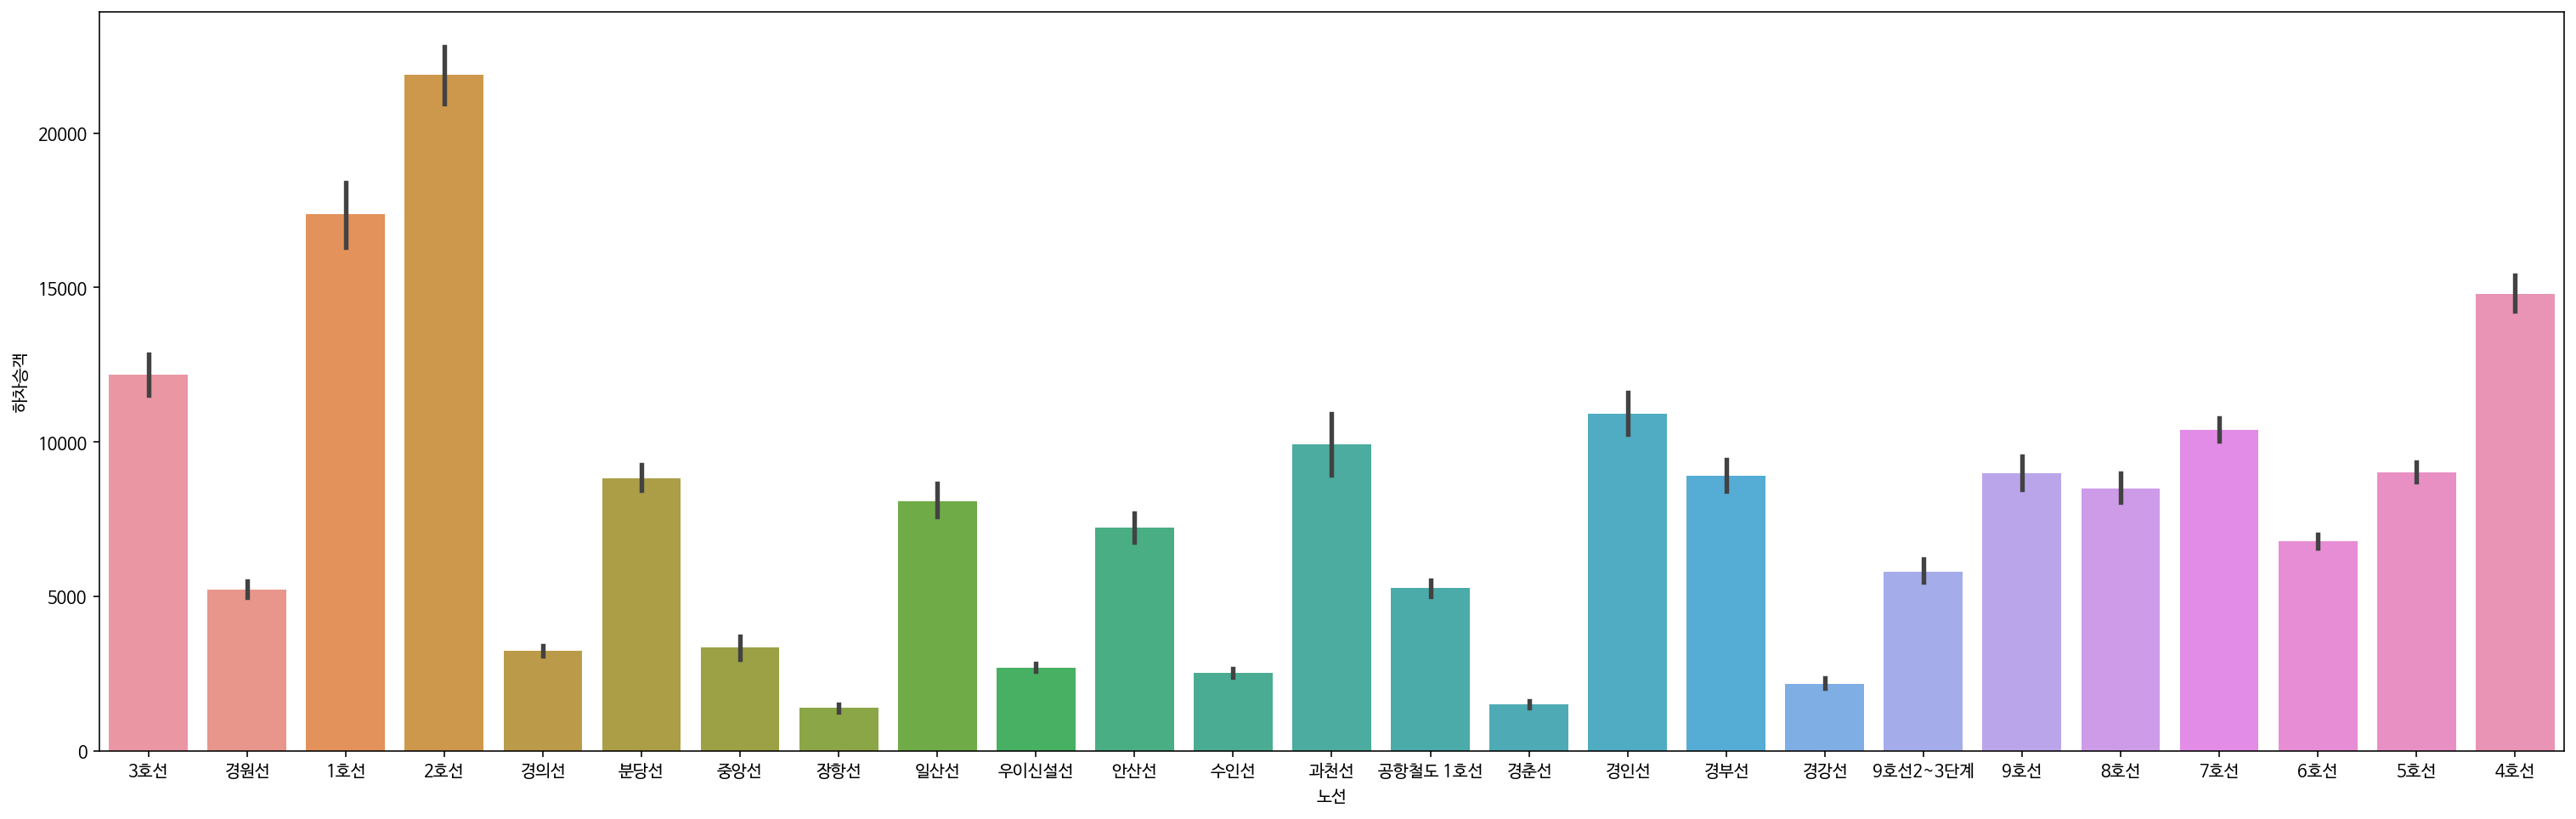

In [59]:
fig=plt.subplots(1, figsize=(26,8))
sns.barplot(x=df["노선"], y=df["하차승객"])
plt.show()

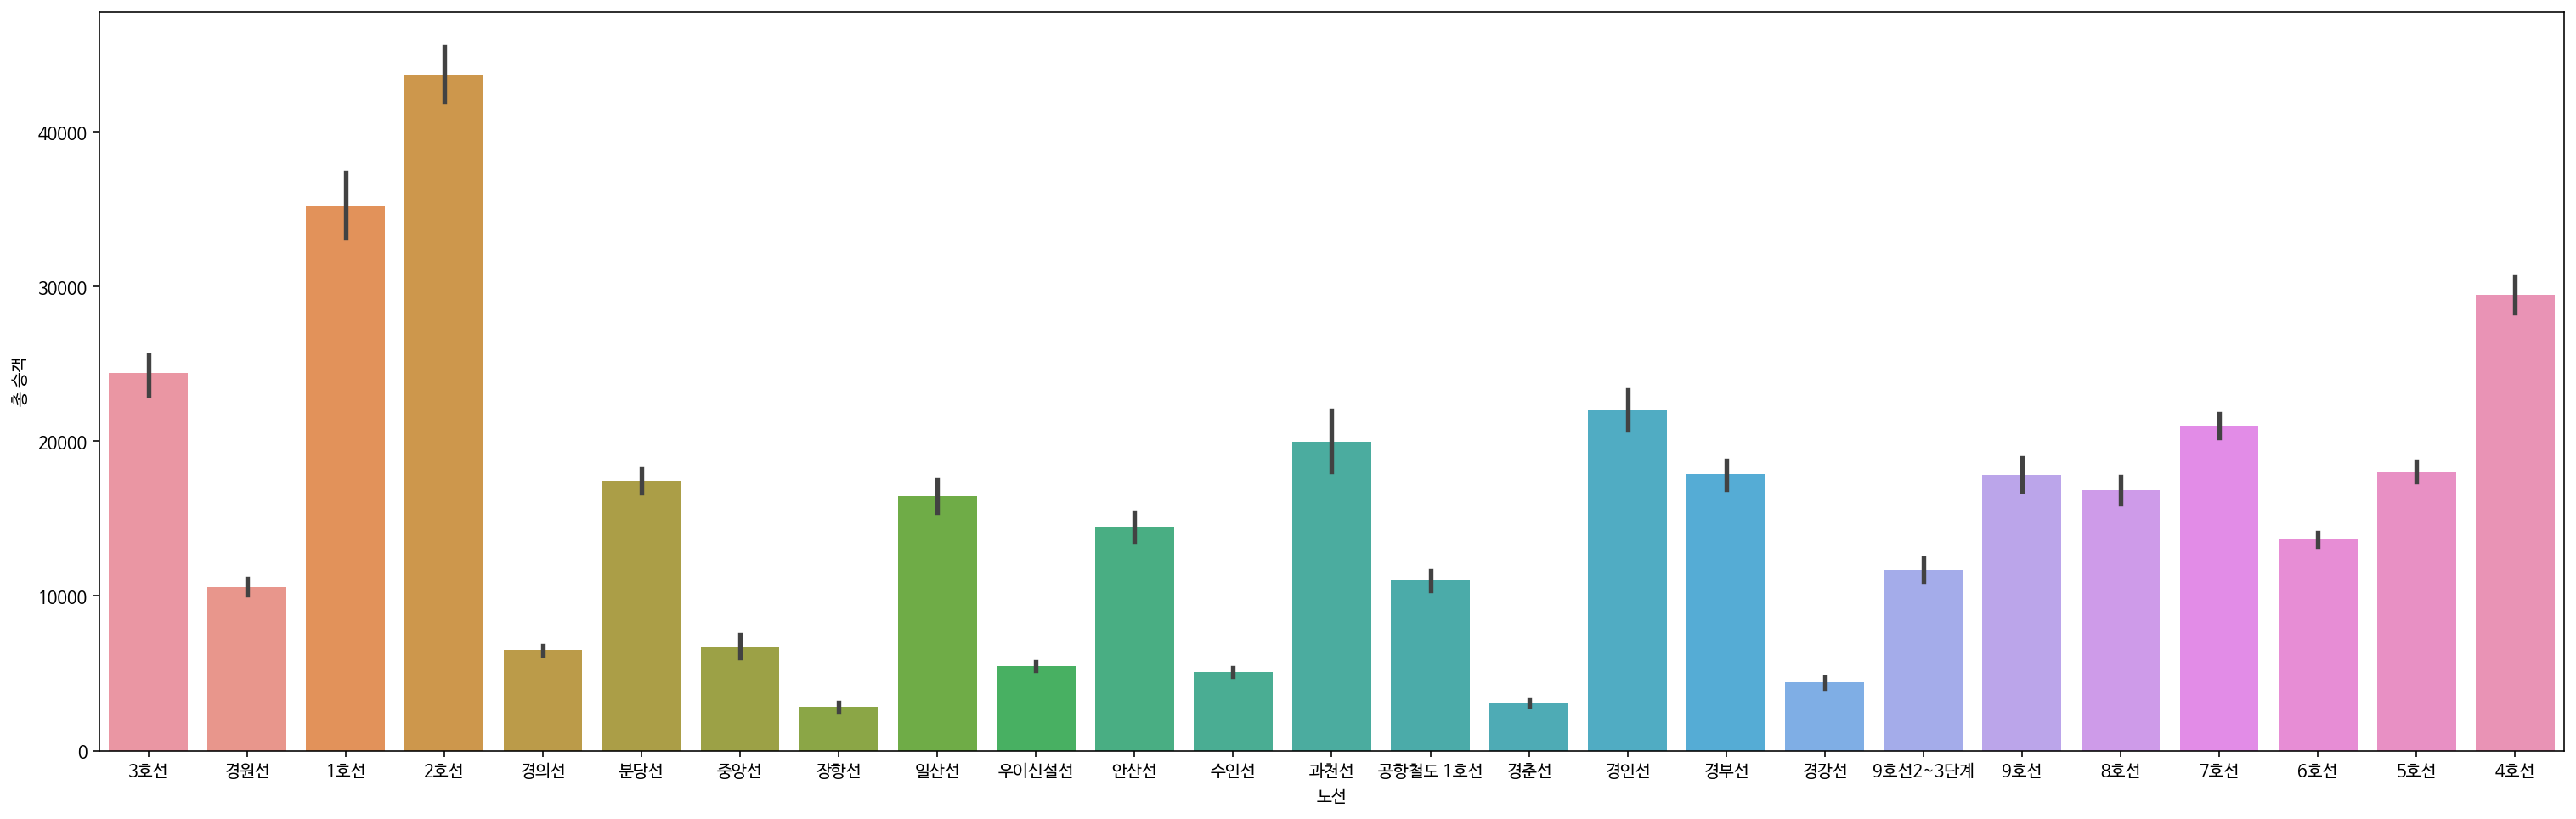

In [60]:
fig=plt.subplots(1, figsize=(26,8))
sns.barplot(x=df["노선"], y=df["총 승객"])
plt.show()

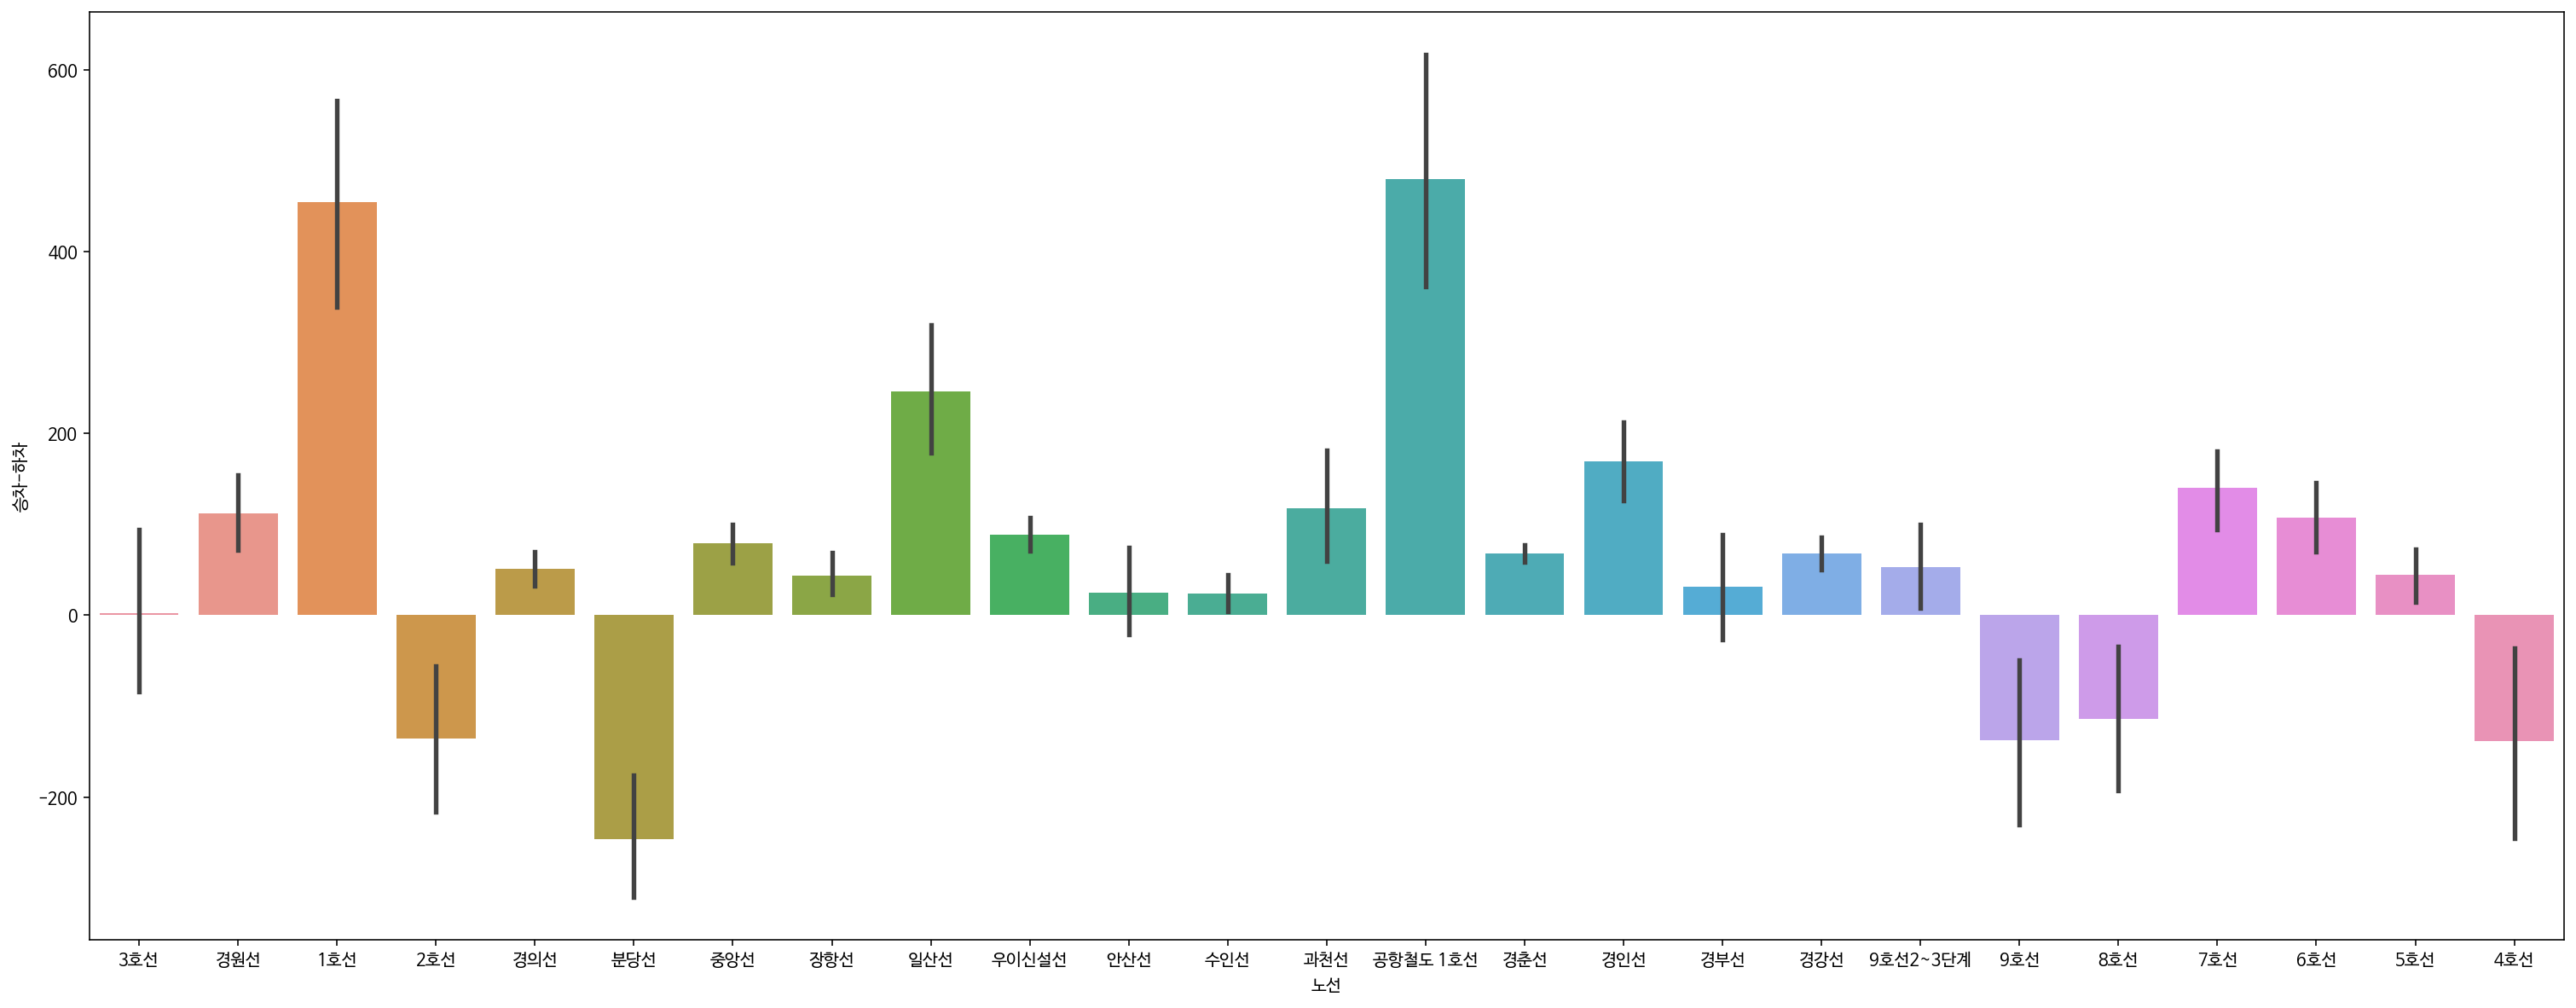

In [62]:
fig=plt.subplots(1, figsize=(26,10))
sns.barplot(x=df["노선"], y=df["승차-하차"])
plt.show()

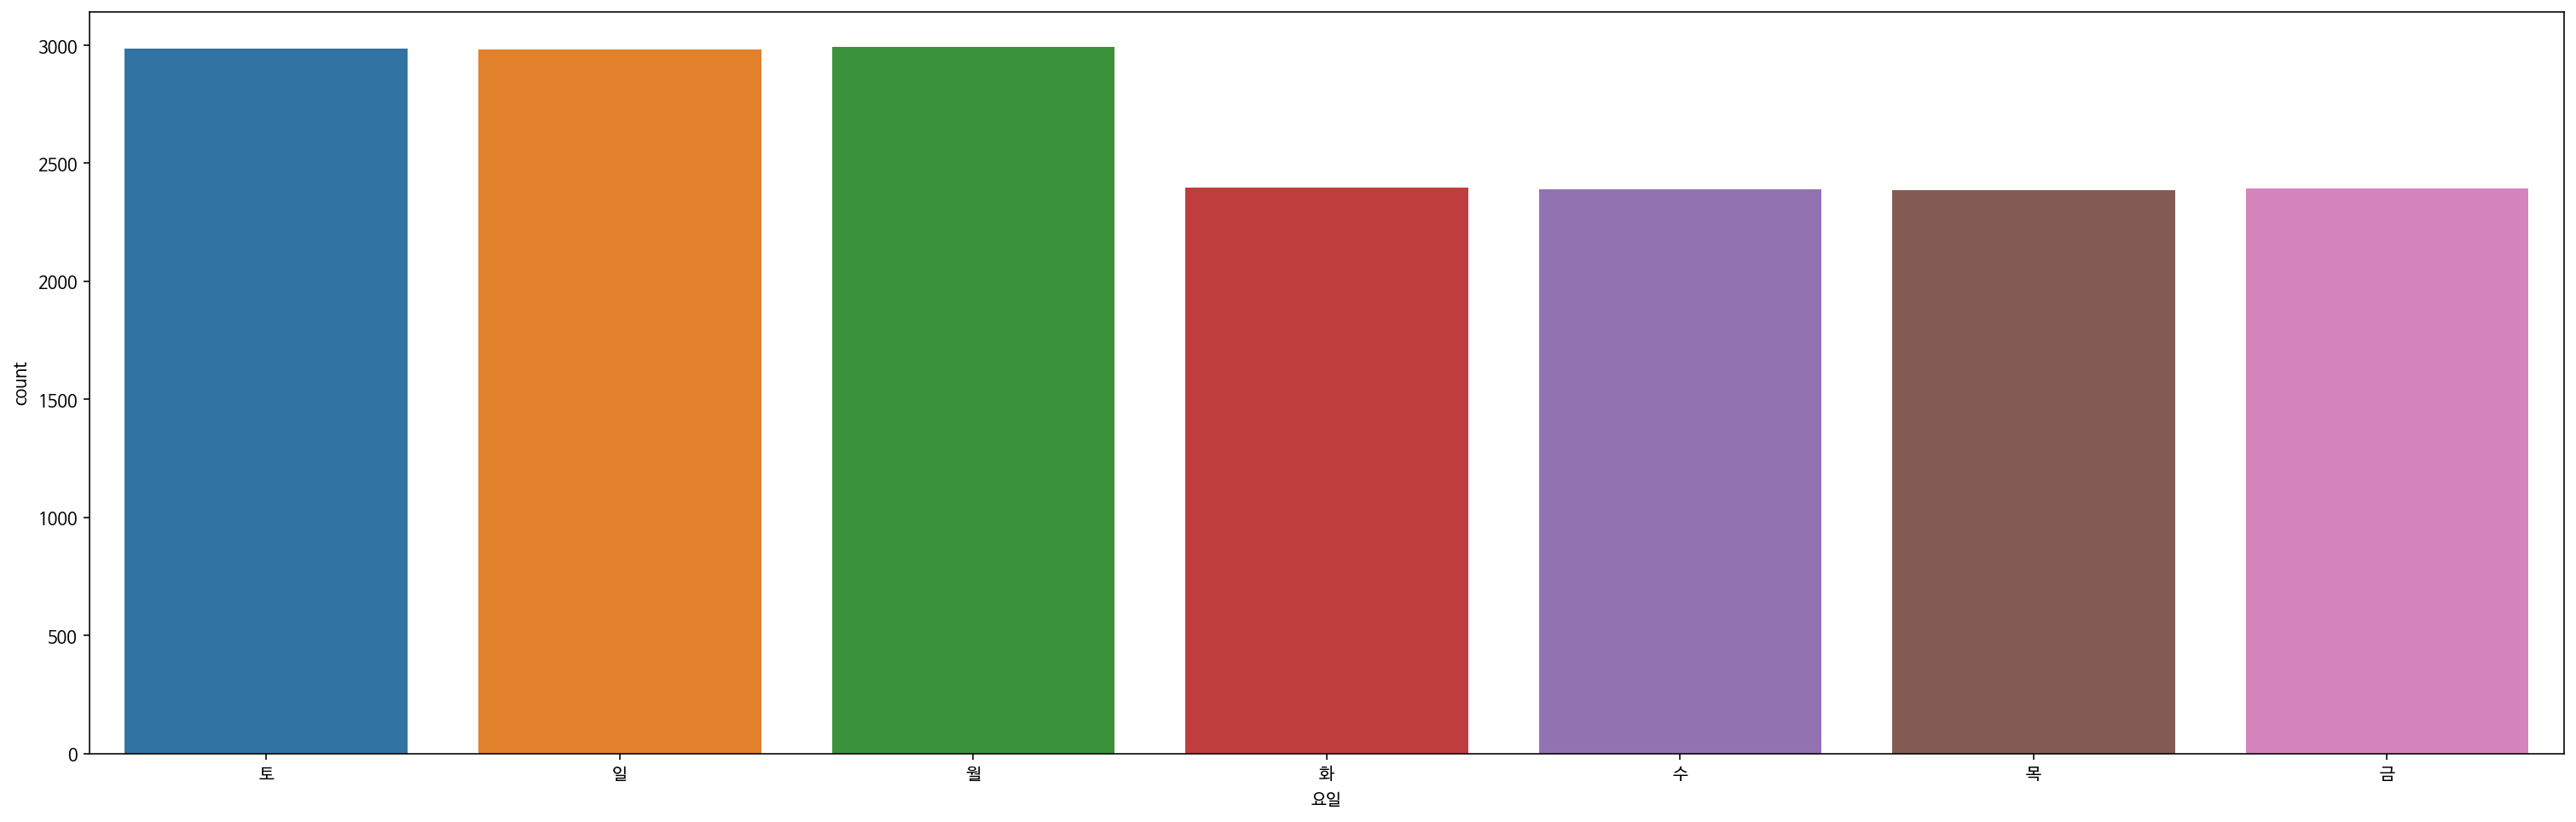

In [63]:
fig=plt.subplots(1, figsize=(26,8))
sns.countplot(x=df["요일"])
plt.show()

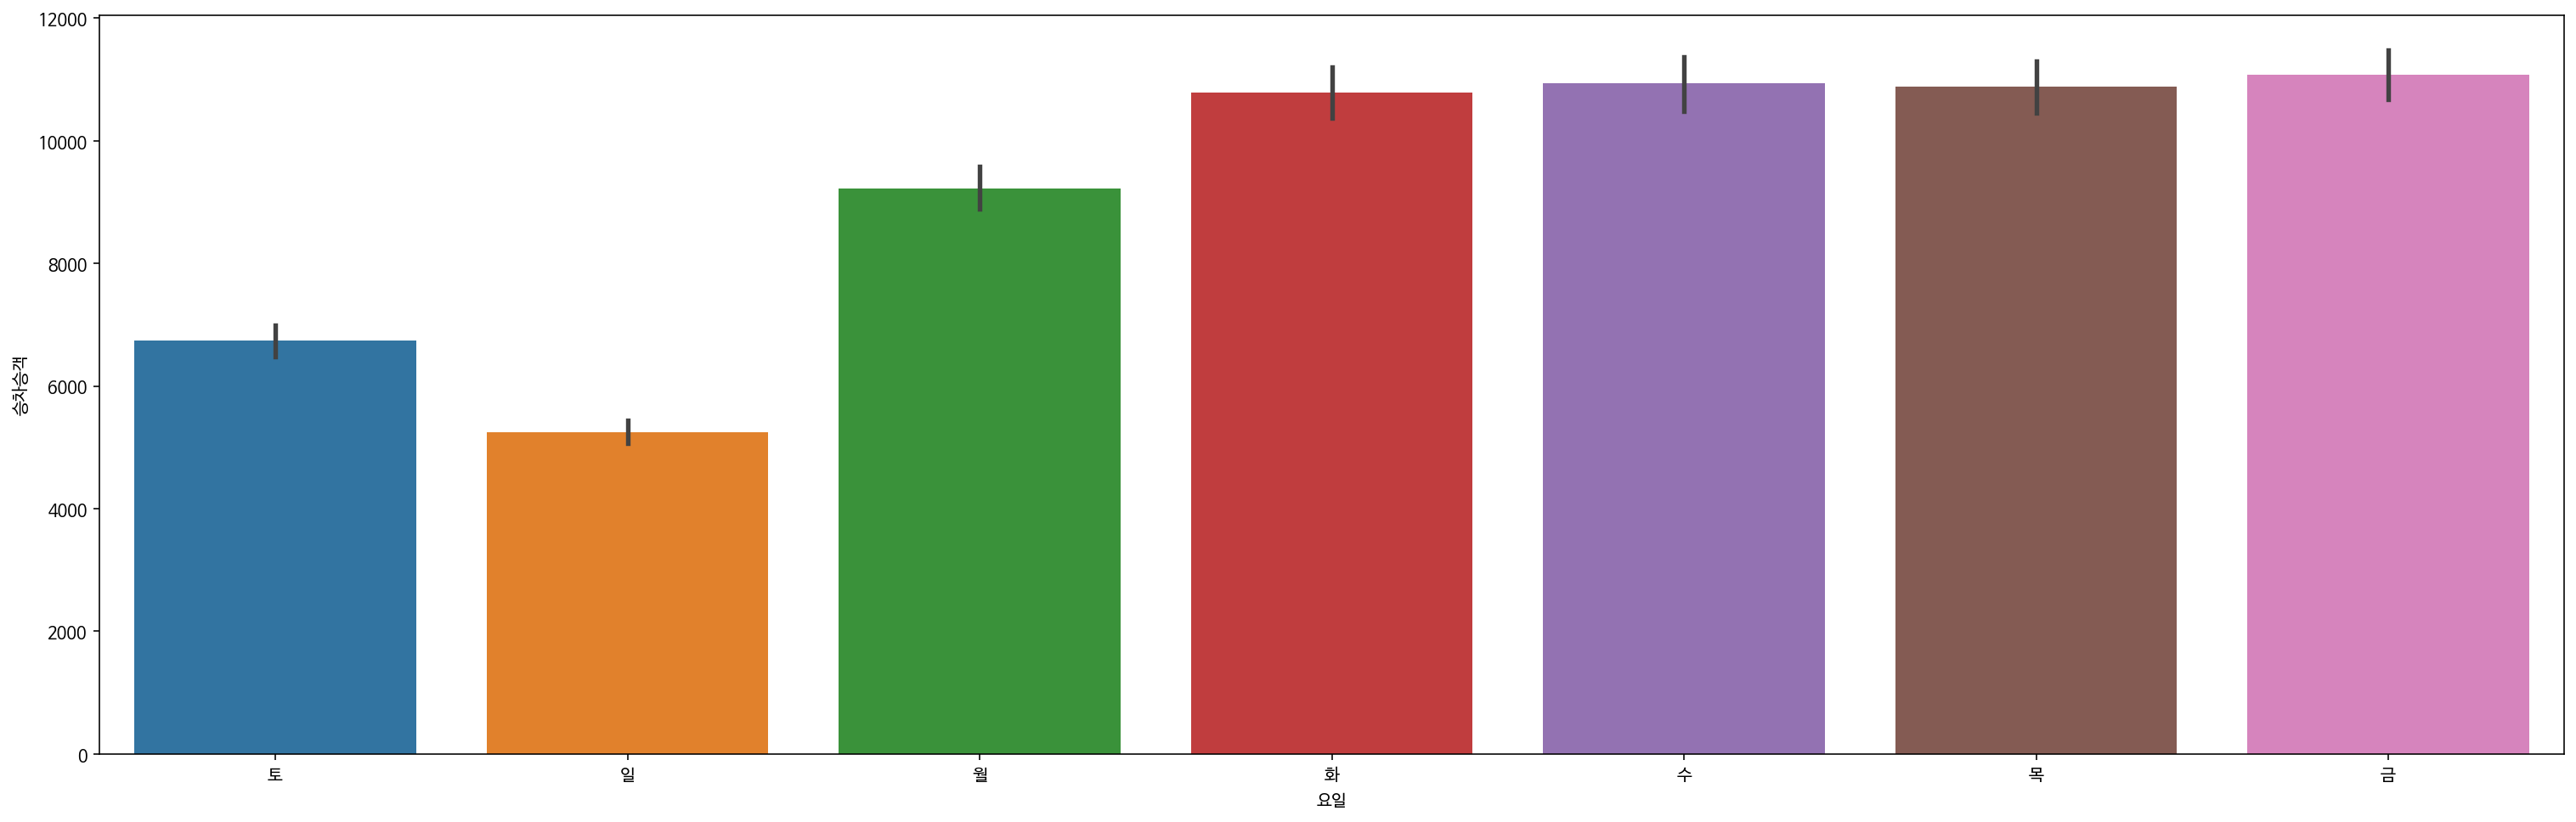

In [69]:
fig=plt.subplots(1, figsize=(26,8))
sns.barplot(x=df["요일"], y=df["승차승객"])
plt.show()

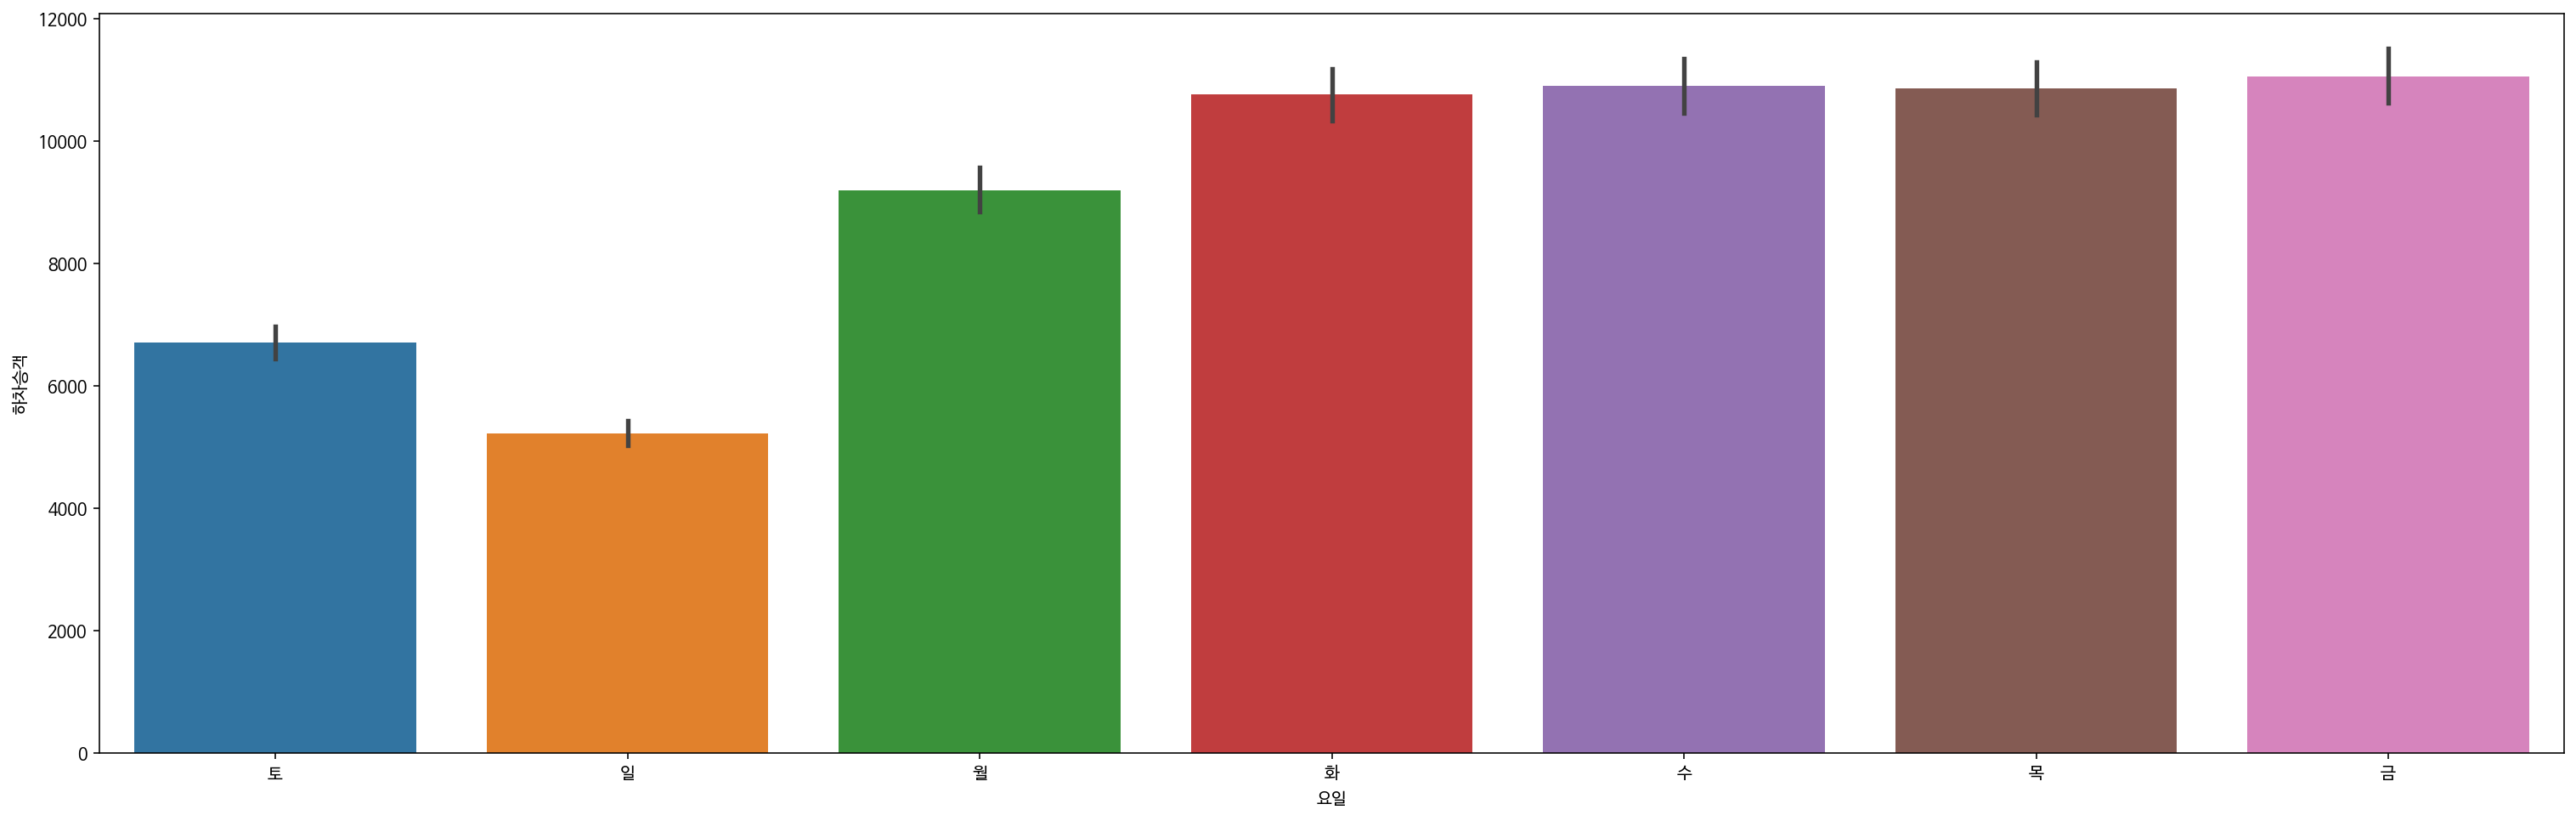

In [70]:
fig=plt.subplots(1, figsize=(26,8))
sns.barplot(x=df["요일"], y=df["하차승객"])
plt.show()

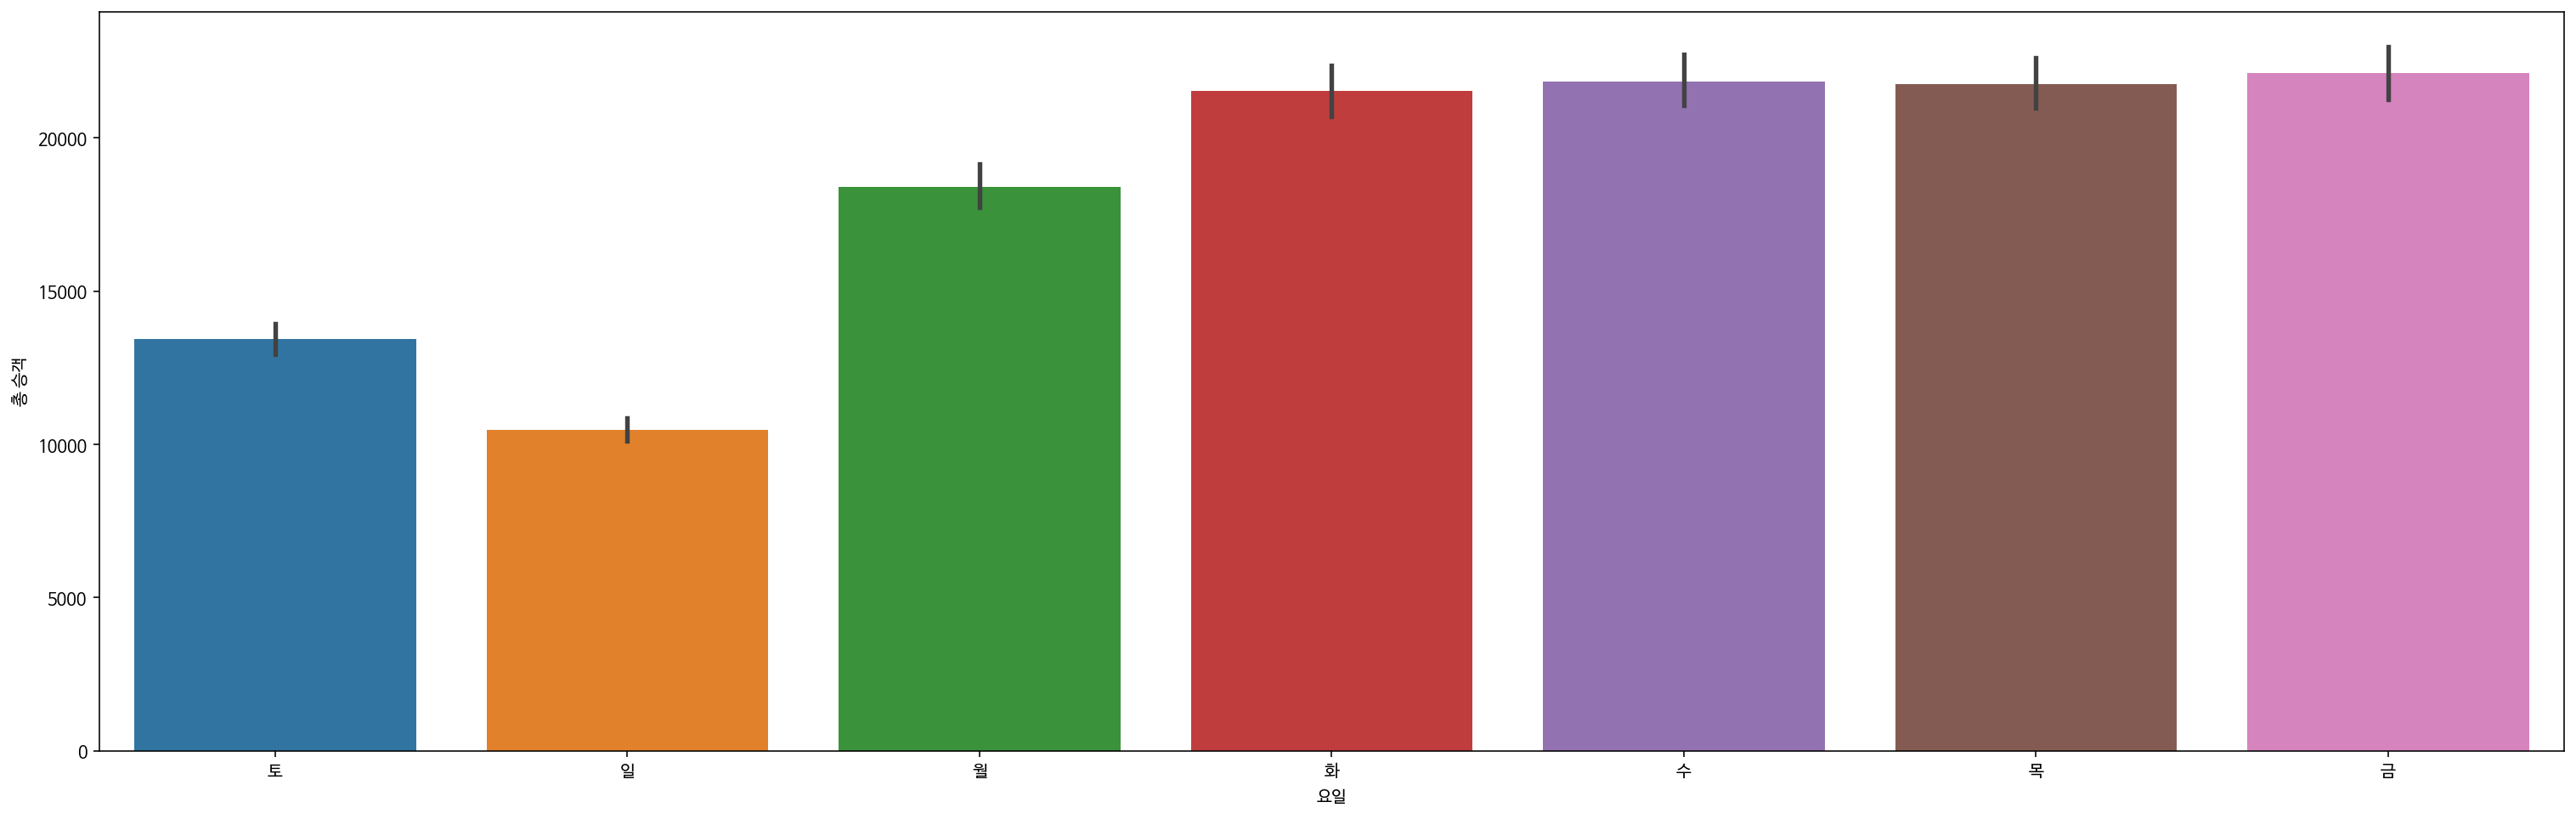

In [71]:
fig=plt.subplots(1, figsize=(26,8))
sns.barplot(x=df["요일"], y=df["총 승객"])
plt.show()

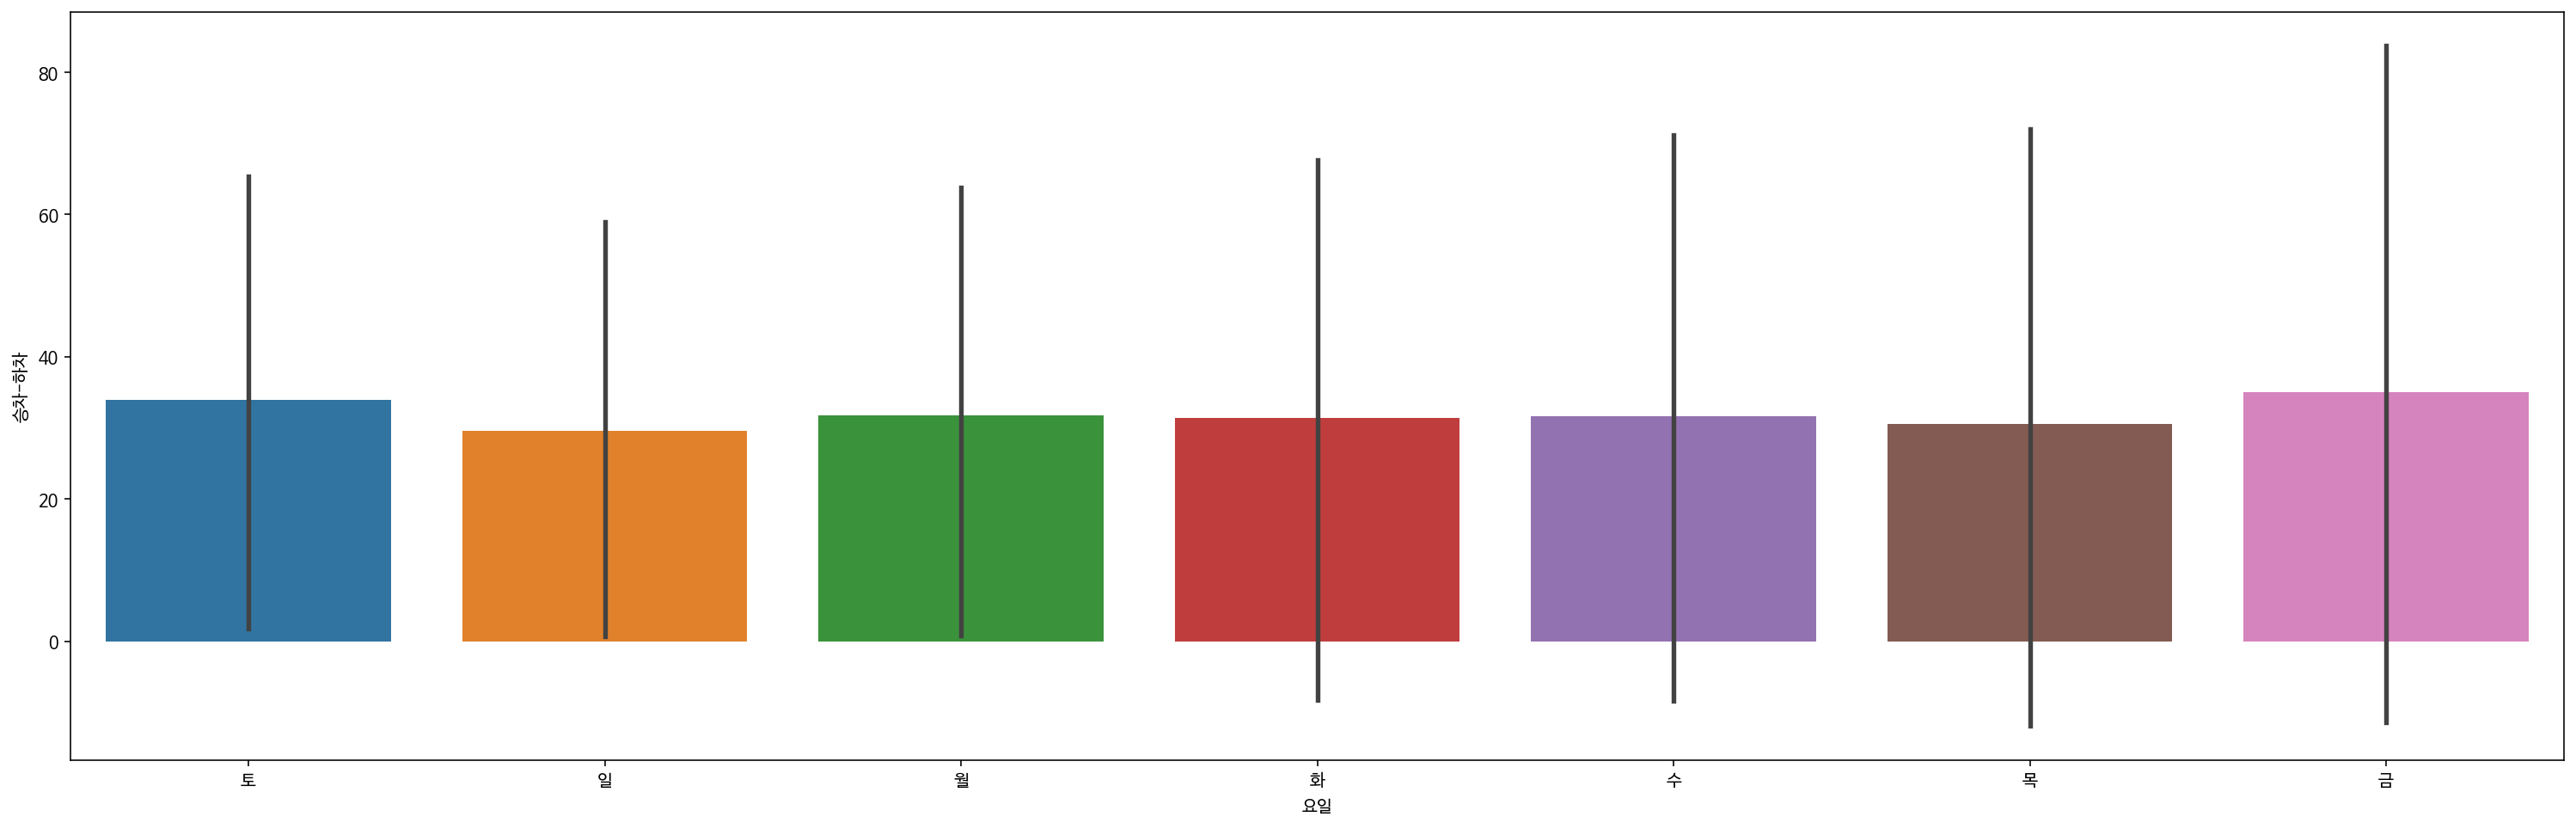

In [72]:
fig=plt.subplots(1, figsize=(26,8))
sns.barplot(x=df["요일"], y=df["승차-하차"])
plt.show()

In [78]:
test5=df[['승차승객','하차승객']]-df[['승차승객','하차승객']].mean()
test5

,승차승객,하차승객
0,-1690.095135,-1952.133794
1,-8599.095135,-8555.133794
2,-5836.095135,-6125.133794
3,-5739.095135,-6225.133794
4,-9059.095135,-9028.133794
...,...,...
18516,-8085.095135,-8062.133794
18517,-7419.095135,-7345.133794
18518,-7727.095135,-7803.133794
18519,-5307.095135,-5053.133794


In [92]:
test6=df[['총 승객']]-df[['총 승객']].mean()
test6

,총 승객
0,-3642.228929
1,-17154.228929
2,-11961.228929
3,-11964.228929
4,-18087.228929
...,...
18516,-16147.228929
18517,-14764.228929
18518,-15530.228929
18519,-10360.228929


In [93]:
test7=df[['승차-하차']]-df[['승차-하차']].mean()
test7

,승차-하차
0,262.038659
1,-43.961341
2,289.038659
3,486.038659
4,-30.961341
...,...
18516,-22.961341
18517,-73.961341
18518,76.038659
18519,-253.961341


In [97]:
test5.sort_values('승차승객', ascending=False)

,승차승객,하차승객
12523,83871.904865,82138.866206
7863,83048.904865,80884.866206
10771,81533.904865,78374.866206
3602,81503.904865,80276.866206
10632,80721.904865,78722.866206
...,...,...
15174,-9059.095135,-9028.133794
5294,-9059.095135,-9028.133794
5293,-9059.095135,-9028.133794
5250,-9059.095135,-9028.133794


In [98]:
test5.sort_values('하차승객', ascending=False)

,승차승객,하차승객
12523,83871.904865,82138.866206
7863,83048.904865,80884.866206
3602,81503.904865,80276.866206
10632,80721.904865,78722.866206
10771,81533.904865,78374.866206
...,...,...
1531,-9057.095135,-9028.133794
12766,-9059.095135,-9028.133794
12767,-9059.095135,-9028.133794
12768,-9058.095135,-9028.133794
